<a href="https://colab.research.google.com/github/2403A52058/ML_LAB_ASSIGNMENTS/blob/main/ML_LAB(10)_2403A52058_b(02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
 Bootstrap Application
Estimating confidence intervals for regression coefficient (β1)
Feature: Engine Size
Target: CO2 Emissions
"""

# Import necessary libraries
import numpy as np                    # For numerical operations
import pandas as pd                   # For data handling
import matplotlib.pyplot as plt       # For plotting
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.utils import resample    # For bootstrap resampling

In [11]:
import pandas as pd

"""
Load dataset with different encoding to fix UnicodeDecodeError.
"""

df = pd.read_excel('/content/CO2 Emissions_Canada.xlsx')

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
"""
Select:
Feature  -> Engine Size
Target   -> CO2 Emissions
"""

# Extract feature (independent variable)
X = df[['Engine Size(L)']]   # Must be 2D for sklearn

# Extract target (dependent variable)
y = df['CO2 Emissions(g/km)']

In [13]:
"""
Fit simple linear regression and extract coefficient β1.
"""

# Create linear regression model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Extract slope coefficient (β1)
beta_1 = model.coef_[0]

print("Estimated β1 (Original Data):", beta_1)

Estimated β1 (Original Data): 36.77731518641943


In [14]:
"""
Perform Bootstrap resampling to estimate confidence intervals.
B = 2000 bootstrap samples.
"""

# Number of bootstrap samples
B = 2000

# Store bootstrap coefficients
bootstrap_betas = []

for i in range(B):
    # Resample dataset with replacement
    X_resampled, y_resampled = resample(X, y)

    # Fit model on resampled data
    model.fit(X_resampled, y_resampled)

    # Store coefficient
    bootstrap_betas.append(model.coef_[0])

# Convert to numpy array
bootstrap_betas = np.array(bootstrap_betas)

In [15]:
"""
Compute:
90% Confidence Interval
95% Confidence Interval
"""

# 90% Confidence Interval
ci_90 = np.percentile(bootstrap_betas, [5, 95])

# 95% Confidence Interval
ci_95 = np.percentile(bootstrap_betas, [2.5, 97.5])

print("90% Confidence Interval for β1:", ci_90)
print("95% Confidence Interval for β1:", ci_95)

90% Confidence Interval for β1: [36.27689017 37.30569805]
95% Confidence Interval for β1: [36.17339371 37.39048995]


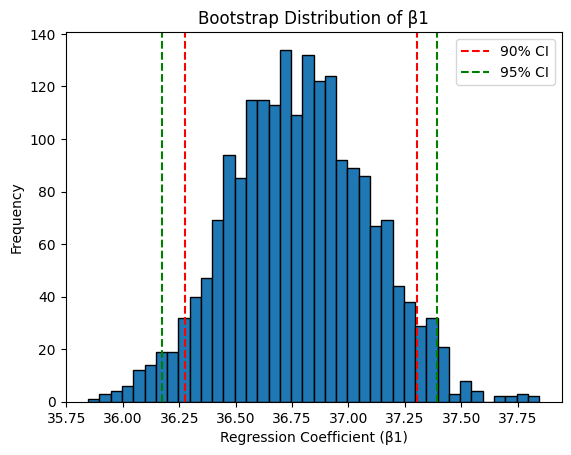

In [16]:
"""
Plot histogram of bootstrap coefficients.
"""

plt.hist(bootstrap_betas, bins=40, edgecolor='black')
plt.axvline(ci_90[0], color='red', linestyle='--', label='90% CI')
plt.axvline(ci_90[1], color='red', linestyle='--')
plt.axvline(ci_95[0], color='green', linestyle='--', label='95% CI')
plt.axvline(ci_95[1], color='green', linestyle='--')

plt.title("Bootstrap Distribution of β1")
plt.xlabel("Regression Coefficient (β1)")
plt.ylabel("Frequency")
plt.legend()
plt.show()